In [12]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict, Counter
from scipy.stats.stats import pearsonr

from datetime import datetime

In [13]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [14]:
url = 'https://raw.githubusercontent.com/ZioTrib/dm2proj/master/datatraining.csv'
df = pd.read_csv(url) 

url_test1 = 'https://raw.githubusercontent.com/ZioTrib/dm2proj/master/datatest.csv'
df_test1 =pd.read_csv(url_test1)

url_test2 = 'https://raw.githubusercontent.com/ZioTrib/dm2proj/master/datatest2.csv'
df_test2 =pd.read_csv(url_test2)

In [15]:
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [17]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.9+ KB


In [18]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 533.4+ KB


# Missing Value

In [19]:
df.isnull().any()

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

In [20]:
df_test1.isnull().any()

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

In [21]:
df_test2.isnull().any()

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

Il datatraining ha come intervallo temporale il periodo che va dal 4 Febbraio 2015 al 10 Febbraio 2015. All'interno di questo periodo sono presenti un solo weekend (7 e 8 Febbraio 2015).

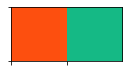

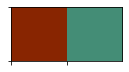

In [22]:
color0 = '#FD4F0F'
color1 = '#15B985'
colordark0 = '#882501'
colordark1 = '#448D76'

colors =[color0,color1]
colorsdark = [colordark0 ,colordark1 ]
sns.palplot(sns.color_palette(colors))
sns.palplot(sns.color_palette(colorsdark))

# Data understanding

In [23]:
df['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

In [24]:
df['Occupancy'].value_counts()/df['Occupancy'].count()

0    0.78767
1    0.21233
Name: Occupancy, dtype: float64

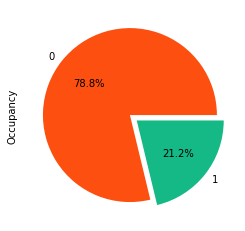

In [25]:
df['Occupancy'].value_counts().plot(kind = 'pie', colors = (color0, color1),explode= (0,0.1),autopct='%1.1f%%')

In [26]:
df[df['Occupancy']==0]['Temperature'].describe(), df[df['Occupancy']==1]['Temperature'].describe()

(count    6414.000000
 mean       20.334931
 std         0.909973
 min        19.000000
 25%        19.500000
 50%        20.200000
 75%        20.890000
 max        23.100000
 Name: Temperature, dtype: float64,
 count    1729.000000
 mean       21.673192
 std         0.622891
 min        19.500000
 25%        21.290000
 50%        21.767500
 75%        22.100000
 max        23.180000
 Name: Temperature, dtype: float64)

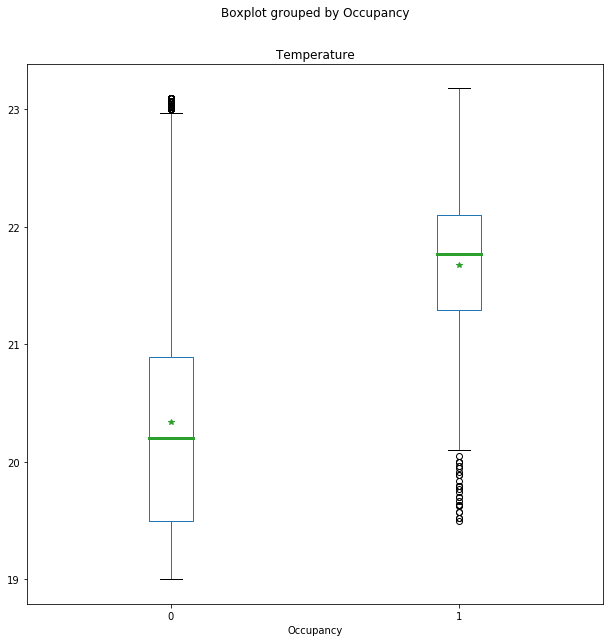

In [27]:
df.boxplot(column = 'Temperature', by = 'Occupancy', figsize = (10,10),grid=False,medianprops=dict(linewidth=3),meanprops = dict(marker = '*'),showmeans = True)

In [28]:
df[df['Occupancy']==0]['CO2'].describe(), df[df['Occupancy']==1]['CO2'].describe()

(count    6414.000000
 mean      490.320312
 std       152.919609
 min       412.750000
 25%       437.000000
 50%       446.000000
 75%       464.500000
 max      1784.500000
 Name: CO2, dtype: float64,
 count    1729.000000
 mean     1037.704786
 std       377.603278
 min       439.000000
 25%       796.000000
 50%       944.000000
 75%      1131.250000
 max      2028.500000
 Name: CO2, dtype: float64)

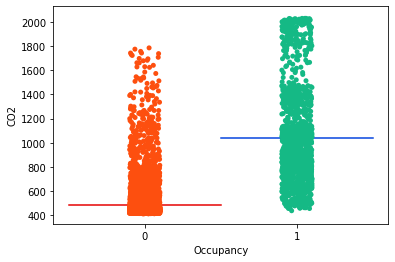

In [29]:
co2_mean_notocc = df[df['Occupancy']==0]['CO2'].mean()
co2_mean_occ = df[df['Occupancy']==1]['CO2'].mean()

mean_width = 0.5

sns.stripplot(x=df['Occupancy'],y=df['CO2'],palette = colors)

x = plt.gca().axes.get_xticks()

plt.plot(mean_width-x, len(x) * [co2_mean_notocc], sns.xkcd_rgb["red"])
plt.plot(mean_width+x, len(x) * [co2_mean_occ], sns.xkcd_rgb["blue"])
plt.show()

Text(0.5, 0, 'date')

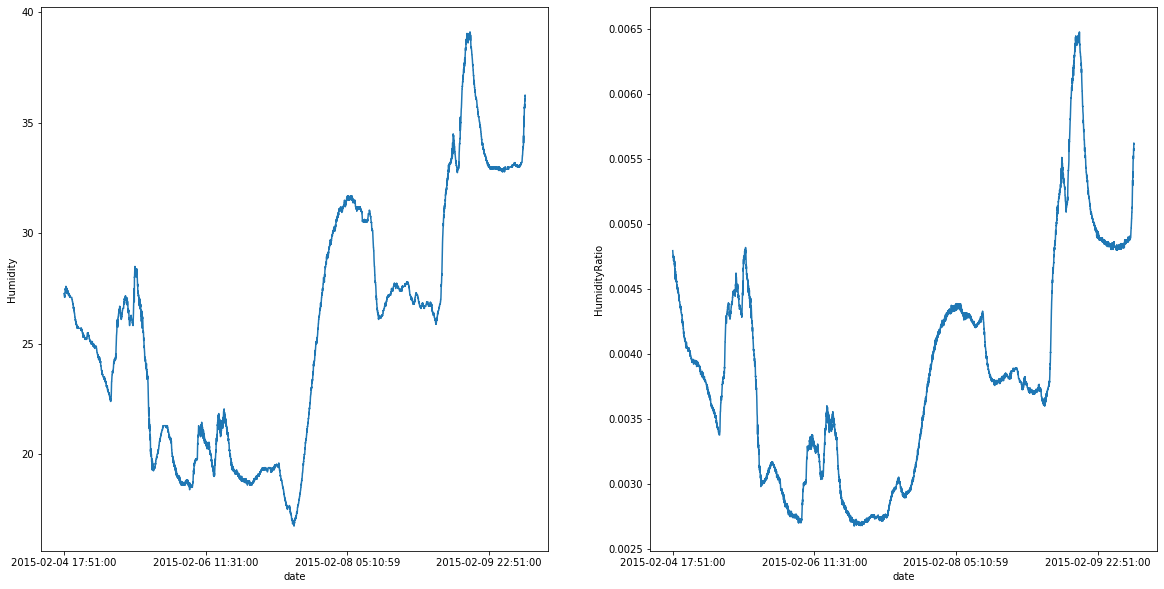

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
ax1.plot(df['date'], df['Humidity'])
ax2.plot(df['date'], df['HumidityRatio'])

ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))

ax1.set_ylabel('Humidity')
ax1.set_xlabel('date')
ax2.set_ylabel('HumidityRatio')
ax2.set_xlabel('date')

In [31]:
df[df['Occupancy']==0]['Light'].describe(), df[df['Occupancy']==1]['Light'].describe()

(count    6414.000000
 mean       27.776442
 std        89.598692
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max      1546.333333
 Name: Light, dtype: float64,
 count    1729.000000
 mean      459.854347
 std        42.286862
 min        31.000000
 25%       433.000000
 50%       454.000000
 75%       477.750000
 max       744.000000
 Name: Light, dtype: float64)

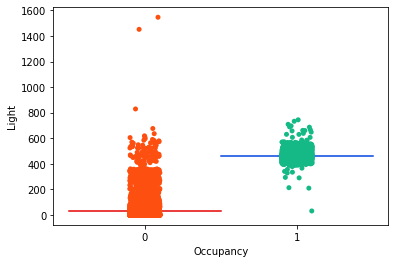

In [32]:
light_mean_notocc = df[df['Occupancy']==0]['Light'].mean()
light_mean_occ = df[df['Occupancy']==1]['Light'].mean()

mean_width = 0.5

sns.stripplot(x=df['Occupancy'],y=df['Light'],palette = colors)

x = plt.gca().axes.get_xticks()

plt.plot(mean_width-x, len(x) * [light_mean_notocc], sns.xkcd_rgb["red"])
plt.plot(mean_width+x, len(x) * [light_mean_occ], sns.xkcd_rgb["blue"])
plt.show()

(               Temperature  Humidity     Light       CO2  HumidityRatio  \
 Temperature       1.000000 -0.141759  0.649942  0.559894       0.151762   
 Humidity         -0.141759  1.000000  0.037828  0.439023       0.955198   
 Light             0.649942  0.037828  1.000000  0.664022       0.230420   
 CO2               0.559894  0.439023  0.664022  1.000000       0.626556   
 HumidityRatio     0.151762  0.955198  0.230420  0.626556       1.000000   
 Occupancy         0.538220  0.132964  0.907352  0.712235       0.300282   
 
                Occupancy  
 Temperature     0.538220  
 Humidity        0.132964  
 Light           0.907352  
 CO2             0.712235  
 HumidityRatio   0.300282  
 Occupancy       1.000000  ,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1af27150>)

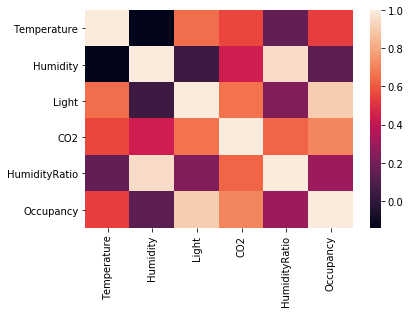

In [33]:
pd.set_option('display.max_columns', 10)

correlation = df.corr()
correlation, sns.heatmap(correlation)

# Data preparation

#### Variabile date - datatraining, datatest e datatest1

In [34]:
df['date'] = pd.to_datetime(df['date'])

In [35]:
day = df['date'].dt.day
df['day'] = day

In [36]:
hour = df['date'].dt.hour
df['hour'] = hour

In [37]:
df_test1['date'] = pd.to_datetime(df_test1['date'])

In [38]:
day = df_test1['date'].dt.day
df_test1['day'] = day

In [39]:
hour = df_test1['date'].dt.hour
df_test1['hour'] = hour

In [40]:
df_test2['date'] = pd.to_datetime(df_test2['date'])

In [41]:
day = df_test2['date'].dt.day
df_test2['day'] = day

In [42]:
hour = df_test2['date'].dt.hour
df_test2['hour'] = hour

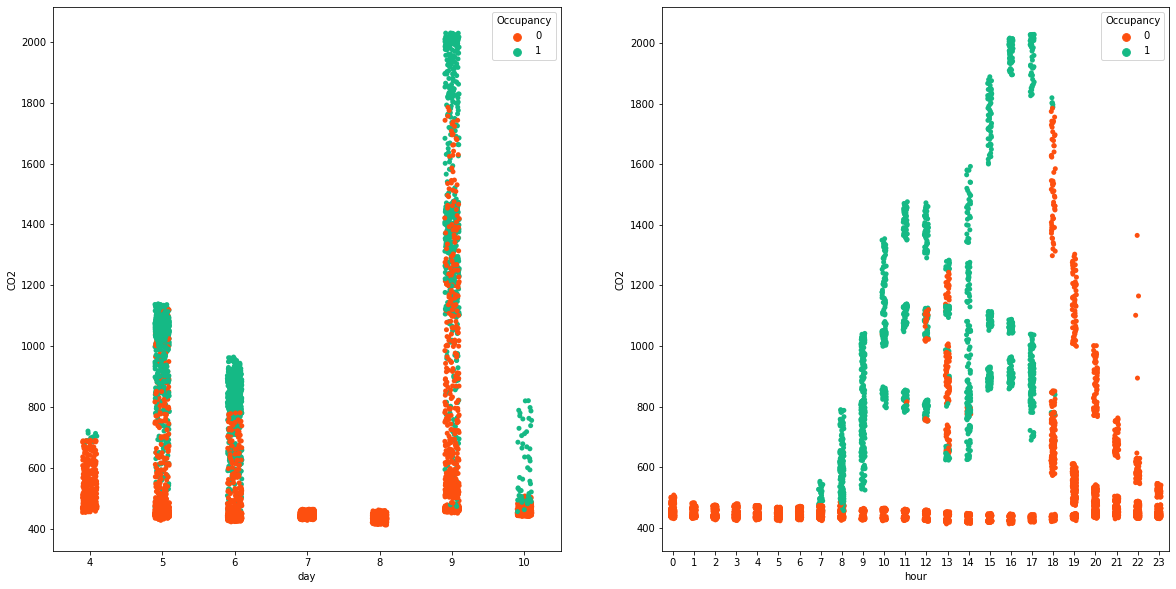

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

sns.stripplot(x = df['day'], y = df['CO2'], hue = df['Occupancy'],palette = colors,ax = ax1 )
sns.stripplot(x = df['hour'], y = df['CO2'], hue = df['Occupancy'],palette = colors,ax = ax2)

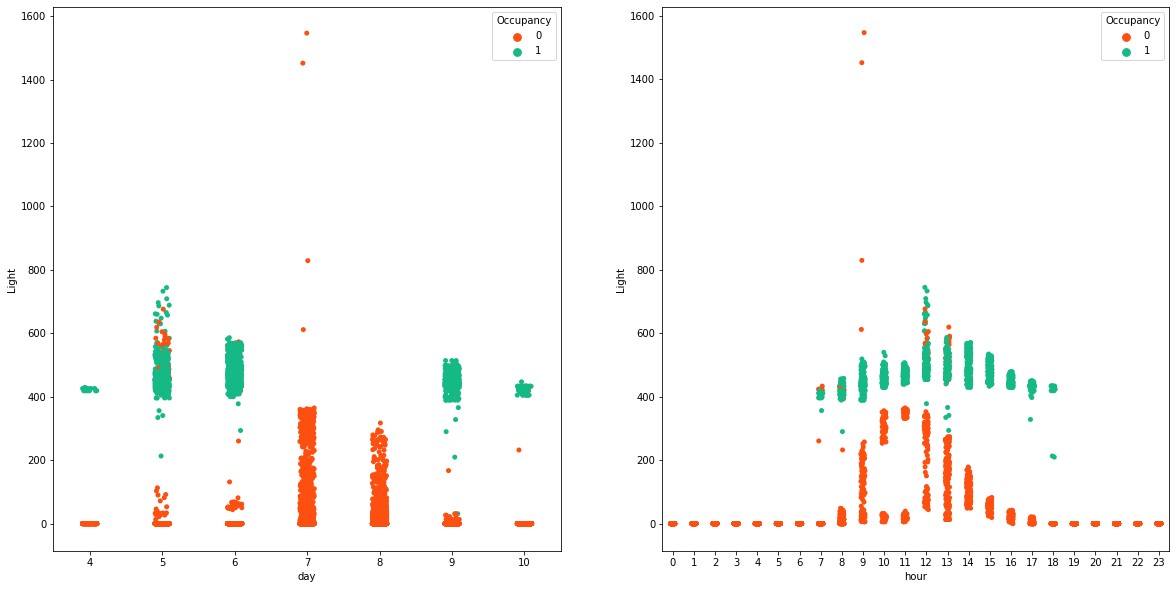

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

sns.stripplot(x = df['day'], y = df['Light'], hue = df['Occupancy'],palette = colors,ax = ax1 )
sns.stripplot(x = df['hour'], y = df['Light'], hue = df['Occupancy'],palette = colors,ax = ax2)

#### Variabile HumidityRatio - datatraining, datatest e datatest1

In [45]:
humidex_index = df['Temperature'] + 5/9*(0.611*df['Humidity']*(10**(0.03*df['Temperature'])) - 10)
humidex_index.describe()

count    8143.000000
mean       51.368250
std         8.275089
min        39.260678
25%        44.865595
50%        49.823392
75%        57.138733
max        78.044018
dtype: float64

In [46]:
for i in range(len(humidex_index)):
    if humidex_index[i]<27:
        humidex_index[i] = 'Benessere'
    elif humidex_index[i]>=27 and humidex_index[i]<30:
        humidex_index[i] = 'Leggero disagio'
    elif humidex_index[i]>=30 and humidex_index[i]<40:
        humidex_index[i] = 'Disagio'
    elif humidex_index[i]>=40 and humidex_index[i]<55:
        humidex_index[i] = 'Grande disagio'
    else:
        humidex_index[i] = 'Pericolo'
        
print(humidex_index)

0       Pericolo
1       Pericolo
2       Pericolo
3       Pericolo
4       Pericolo
          ...   
8138    Pericolo
8139    Pericolo
8140    Pericolo
8141    Pericolo
8142    Pericolo
Length: 8143, dtype: object


In [47]:
df['Humidex_index'] = humidex_index
df['Humidex_index'].value_counts()

Grande disagio    5316
Pericolo          2189
Disagio            638
Name: Humidex_index, dtype: int64

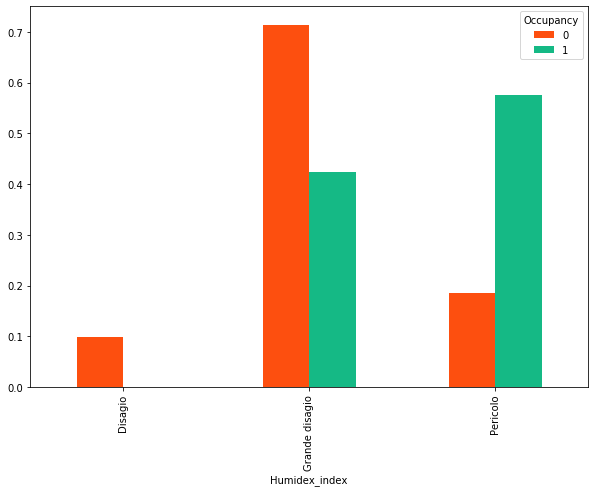

In [48]:
humidex_occ = pd.crosstab(df['Humidex_index'],df['Occupancy'],normalize = 'columns')
humidex_occ.plot(kind='bar',figsize = (10,7), color = (color0,color1))

In [49]:
humidex_index = df_test1['Temperature'] + 5/9*(0.611*df_test1['Humidity']*(10**(0.03*df_test1['Temperature'])) - 10)
humidex_index.describe()

count    2665.000000
mean       53.993361
std         6.985102
min        45.870205
25%        48.397512
50%        51.260432
75%        60.011680
max        68.395162
dtype: float64

In [50]:
for i in range(len(humidex_index)):
    if humidex_index[i]<27:
        humidex_index[i] = 'Benessere'
    elif humidex_index[i]>=27 and humidex_index[i]<30:
        humidex_index[i] = 'Leggero disagio'
    elif humidex_index[i]>=30 and humidex_index[i]<40:
        humidex_index[i] = 'Disagio'
    elif humidex_index[i]>=40 and humidex_index[i]<55:
        humidex_index[i] = 'Grande disagio'
    else:
        humidex_index[i] = 'Pericolo'
        
print(humidex_index)

0       Pericolo
1       Pericolo
2       Pericolo
3       Pericolo
4       Pericolo
          ...   
2660    Pericolo
2661    Pericolo
2662    Pericolo
2663    Pericolo
2664    Pericolo
Length: 2665, dtype: object


In [51]:
df_test1['Humidex_index'] = humidex_index
df_test1['Humidex_index'].value_counts()

Grande disagio    1655
Pericolo          1010
Name: Humidex_index, dtype: int64

In [52]:
humidex_index = df_test2['Temperature'] + 5/9*(0.611*df_test2['Humidity']*(10**(0.03*df_test2['Temperature'])) - 10)
humidex_index.describe()

count    9752.000000
mean       58.648971
std         5.133460
min        45.812228
25%        55.302944
50%        58.940839
75%        62.614883
max        71.488875
dtype: float64

In [53]:
for i in range(len(humidex_index)):
    if humidex_index[i]<27:
        humidex_index[i] = 'Benessere'
    elif humidex_index[i]>=27 and humidex_index[i]<30:
        humidex_index[i] = 'Leggero disagio'
    elif humidex_index[i]>=30 and humidex_index[i]<40:
        humidex_index[i] = 'Disagio'
    elif humidex_index[i]>=40 and humidex_index[i]<55:
        humidex_index[i] = 'Grande disagio'
    else:
        humidex_index[i] = 'Pericolo'
        
print(humidex_index)

0             Pericolo
1             Pericolo
2             Pericolo
3             Pericolo
4             Pericolo
             ...      
9747    Grande disagio
9748          Pericolo
9749          Pericolo
9750          Pericolo
9751          Pericolo
Length: 9752, dtype: object


In [54]:
df_test2['Humidex_index'] = humidex_index
df_test2['Humidex_index'].value_counts()

Pericolo          7415
Grande disagio    2337
Name: Humidex_index, dtype: int64

In [55]:
dummies = pd.get_dummies(df['Humidex_index'], prefix_sep='=')
df['Disagio'] = dummies['Disagio']
df['Grande disagio'] = dummies['Grande disagio']
df['Pericolo'] = dummies['Pericolo']

columns2remove = ['date','HumidityRatio', 'Humidex_index']
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,Temperature,Humidity,Light,CO2,Occupancy,day,hour,Disagio,Grande disagio,Pericolo
0,23.18,27.2720,426.0,721.25,1,4,17,0,0,1
1,23.15,27.2675,429.5,714.00,1,4,17,0,0,1
2,23.15,27.2450,426.0,713.50,1,4,17,0,0,1
3,23.15,27.2000,426.0,708.25,1,4,17,0,0,1
4,23.10,27.2000,426.0,704.50,1,4,17,0,0,1


In [56]:
dummies = pd.get_dummies(df_test1['Humidex_index'], prefix_sep='=')
df_test1['Disagio'] = [0] * dummies['Grande disagio']
df_test1['Grande disagio'] = dummies['Grande disagio']
df_test1['Pericolo'] = dummies['Pericolo']

columns2remove = ['date','HumidityRatio', 'Humidex_index']
df_test1.drop(columns2remove, inplace=True, axis=1)
df_test1.head()

,Temperature,Humidity,Light,CO2,Occupancy,day,hour,Disagio,Grande disagio,Pericolo
0,23.7000,26.272,585.200000,749.200000,1,2,14,0,0,1
1,23.7180,26.290,578.400000,760.400000,1,2,14,0,0,1
2,23.7300,26.230,572.666667,769.666667,1,2,14,0,0,1
3,23.7225,26.125,493.750000,774.750000,1,2,14,0,0,1
4,23.7540,26.200,488.600000,779.000000,1,2,14,0,0,1


In [57]:
dummies = pd.get_dummies(df_test2['Humidex_index'], prefix_sep='=')
df_test2['Disagio'] = [0] * dummies['Grande disagio']
df_test2['Grande disagio'] = dummies['Grande disagio']
df_test2['Pericolo'] = dummies['Pericolo']

columns2remove = ['date','HumidityRatio', 'Humidex_index']
df_test2.drop(columns2remove, inplace=True, axis=1)
df_test2.head()

,Temperature,Humidity,Light,CO2,Occupancy,day,hour,Disagio,Grande disagio,Pericolo
0,21.7600,31.133333,437.333333,1029.666667,1,11,14,0,0,1
1,21.7900,31.000000,437.333333,1000.000000,1,11,14,0,0,1
2,21.7675,31.122500,434.000000,1003.750000,1,11,14,0,0,1
3,21.7675,31.122500,439.000000,1009.500000,1,11,14,0,0,1
4,21.7900,31.133333,437.333333,1005.666667,1,11,14,0,0,1


# Classification task

In [58]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score, precision_score
from sklearn import svm, datasets, tree
from sklearn.model_selection import GridSearchCV

In [59]:
attributes = [col for col in df.columns if col != 'Occupancy']
X_train = df[attributes].values
y_train = df['Occupancy']

X_test = df_test1[attributes].values
y_test = df_test1['Occupancy']

#### K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = list(range(1, int(math.sqrt(len(df)) + 1)))

param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier(weights = 'distance')

grid_distance = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_distance.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
k_range = list(range(1, int(math.sqrt(len(df)) + 1)))

param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier(weights = 'uniform')

grid_uniform = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_uniform.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

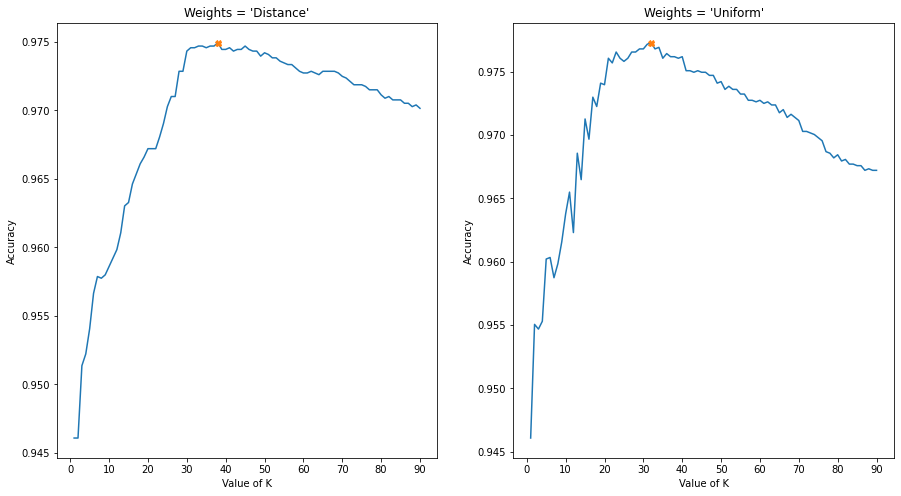

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))

ax1.plot(k_range, grid_distance.cv_results_['mean_test_score'])
ax1.set_title('Weights = \'Distance\'')
ax1.plot(grid_distance.best_params_['n_neighbors'], grid_distance.best_score_, marker = 'X')
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

ax2.plot(k_range, grid_uniform.cv_results_['mean_test_score'])
ax2.set_title('Weights = \'Uniform\'')
ax2.plot(grid_uniform.best_params_['n_neighbors'], grid_uniform.best_score_,  marker = 'X')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))

for ax in (ax1,ax2):
    ax.set(xlabel='Value of K', ylabel='Accuracy')


In [ ]:
print(grid_distance.best_score_), print(grid_distance.best_params_), print(grid_distance.best_estimator_)

0.9749512367917275
{'n_neighbors': 38}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='distance')


(None, None, None)

In [ ]:
print(grid_uniform.best_score_), print(grid_uniform.best_params_)

0.9772850876531857
{'n_neighbors': 32}


(None, None)

In [ ]:
knn = grid_uniform.best_estimator_
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

In [ ]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

n_neighbors = 32

# import some data 

X = df[['Light','Temperature']].values
y = df['Occupancy']

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap([color0, color1])
cmap_bold = ListedColormap([colordark0,colordark1])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [79]:
num_attributes = [col for col in df.columns if col not in ['Occupancy','Disagio','Grande disagio','Pericolo', 'day', 'hour']]
cat_attributes = [col for col in df.columns if col in ['Disagio','Grande disagio','Pericolo', 'day', 'hour']]

X_train_num = df[num_attributes].values
X_train_cat = df[cat_attributes].values

X_test_num = df_test1[num_attributes].values
X_test_cat = df_test1[cat_attributes].values

num_attributes, cat_attributes

(['Temperature', 'Humidity', 'Light', 'CO2'],
 ['day', 'hour', 'Disagio', 'Grande disagio', 'Pericolo'])

In [80]:
nb_num = GaussianNB()
nb_num.fit(X_train_num, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
nb_num.sigma_, nb_num.theta_

(array([[8.28021117e-01, 2.80315559e+01, 8.02667409e+03, 2.33807609e+04],
        [3.87867952e-01, 3.75368518e+01, 1.78714459e+03, 1.42501769e+05]]),
 array([[  20.33493132,   25.34968486,   27.77644216,  490.32031234],
        [  21.67319178,   27.14793821,  459.85434741, 1037.704786  ]]))

In [83]:
nb_cat = CategoricalNB()
nb_cat.fit(X_train_cat, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb_cat.feature_log_prob_

In [ ]:
y_pred_num = nb_num.predict(X_train_num)
print('Accuracy %s' % accuracy_score(y_train, y_pred_num))


In [ ]:
y_pred_cat = nb_cat.predict(X_train_cat)
print('Accuracy %s' % accuracy_score(y_train, y_pred_cat))

Accuracy 0.9412992754513079


#### Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train_num)
X_test_log = scaler.fit_transform (X_test_num)

In [ ]:
logistic = LogisticRegressionCV(cv=10, verbose = 0, scoring = 'accuracy')
logistic.fit(X_train_log, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='accuracy', solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
logistic.coef_, logistic.intercept_, num_attributes

(array([[-0.62392622, -0.04364801,  3.04521523,  1.31450001]]),
 array([-3.42948643]),
 ['Temperature', 'Humidity', 'Light', 'CO2'])

In [ ]:
from scipy.special import expit

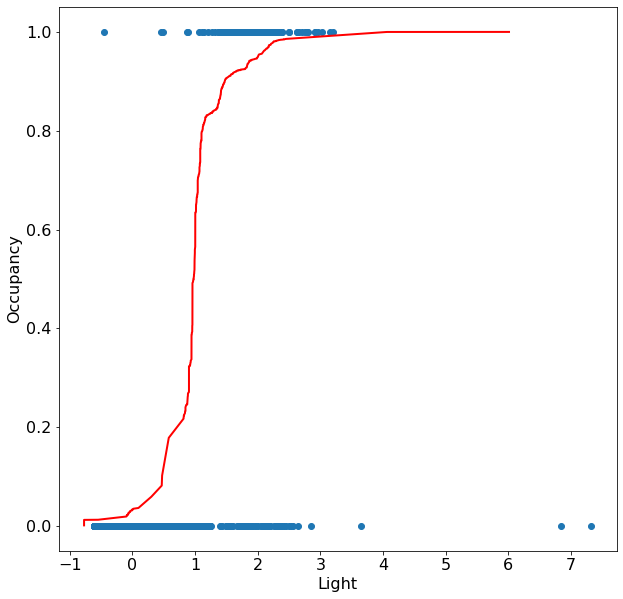

In [ ]:
loss = expit(sorted(np.dot(X_test_log, np.transpose(logistic.coef_))) + logistic.intercept_).ravel()
plt.figure(figsize=(10,10))
plt.plot(sorted(X_test_log[:,2]), loss, color='red', linewidth=2)
plt.scatter(X_train_log[:,2], y_train)
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
y_pred = logistic.predict(X_train_log)
print('Accuracy %s' % accuracy_score(y_train, y_pred))

Accuracy 0.9883335380081051


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

In [ ]:
param_list = {
    'max_depth': [1,2,3,4,5,6,7,8,9],
    'min_samples_split': [2,5,10,20,50,100,150,200],
    'min_samples_leaf': [10,50,100,150,200],
    'criterion': ['gini', 'entropy']
}

dec_tree = DecisionTreeClassifier(class_weight='balanced')

grid = GridSearchCV(dec_tree,param_grid=param_list, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid

In [ ]:
dec_tree = grid.best_estimator_
dec_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
y_pred = dec_tree.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred))

Accuracy 0.9925089033525728


In [ ]:
for col, imp in zip(attributes, dec_tree.feature_importances_):
    print(col, imp)

Temperature 0.006515582795161398
Humidity 0.01289622031180091
Light 0.9649434069286481
CO2 0.007638279534029383
day 0.0
hour 0.008006510430360252
Disagio 0.0
Grande disagio 0.0
Pericolo 0.0


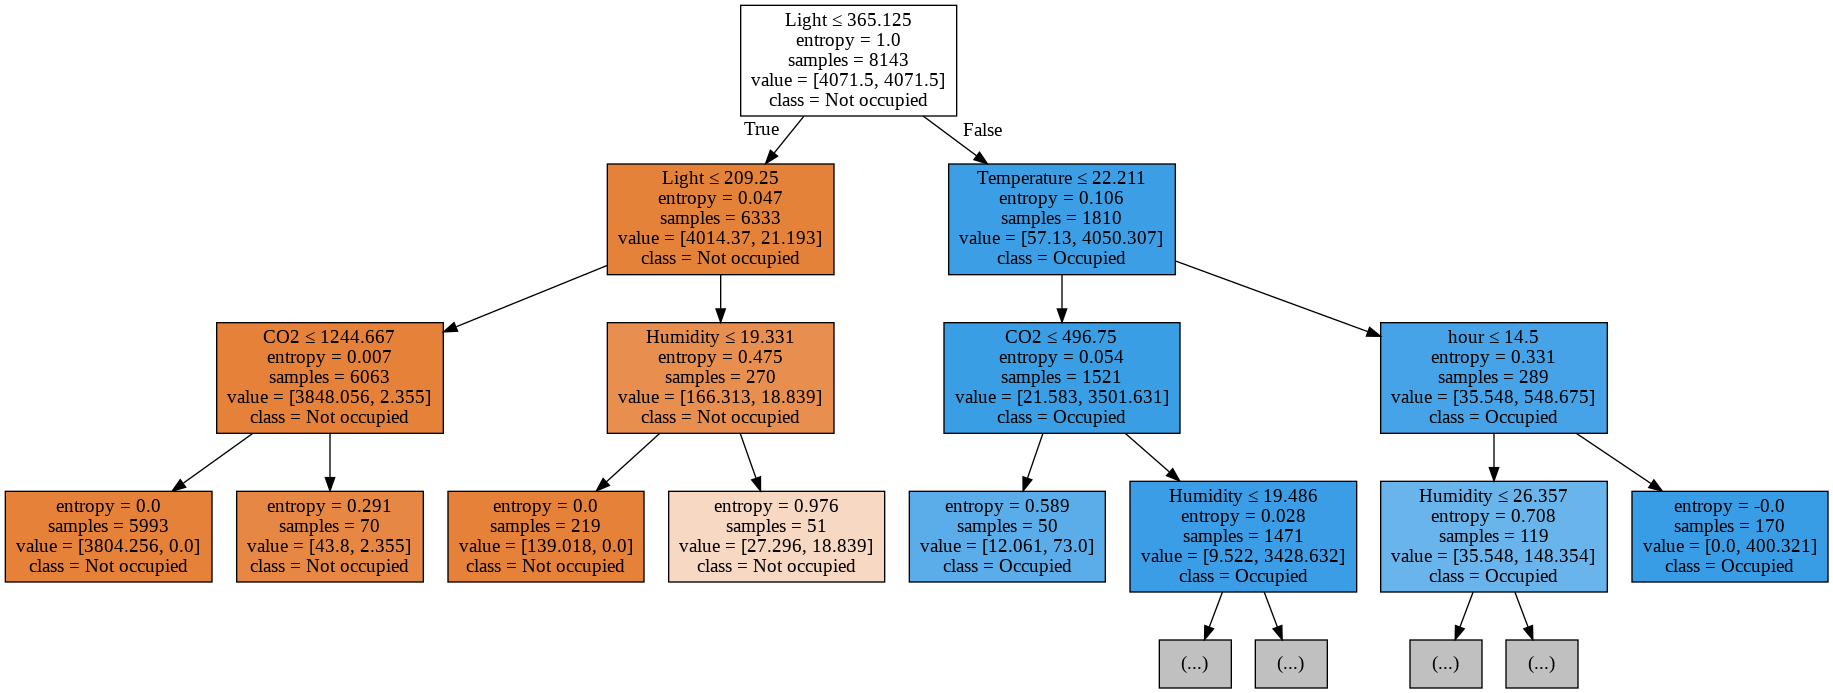

In [ ]:
dot_data = export_graphviz(dec_tree, out_file=None, 
                                feature_names=attributes,
                                class_names=['Occupied' if x == 1 else 'Not occupied' for x in dec_tree.classes_],  
                                filled=True, rounded=False,  
                                special_characters=True,
                               max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
colors = (color0, color1)
Image(graph.create_png())

# Evaluation of classifiers

#### K-NN

In [ ]:
y_pred = knn.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98259304 0.97097097]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9824325046973861


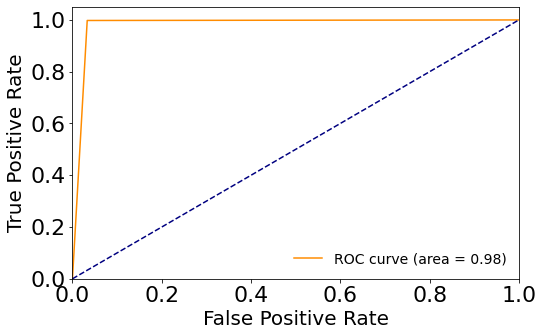

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

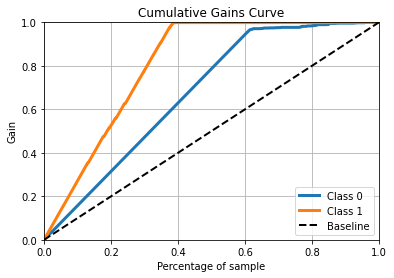

In [ ]:
import scikitplot as skplt

# Deriving Class probabilities
predicted_probabilities = knn.predict_proba(X_test)

# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

In [ ]:
df_test1['Occupancy'].value_counts()/df_test1['Occupancy'].count()

0    0.635272
1    0.364728
Name: Occupancy, dtype: float64

#### Naive Bayes

In [ ]:
y_pred_num = nb_num.predict(X_test_num)

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_num))
print('F1-score %s' % f1_score(y_test, y_pred_num, average=None))
print(classification_report(y_test, y_pred_num))

Accuracy 0.9774859287054409
F1-score [0.98201439 0.96990973]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_num)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9811846285479546


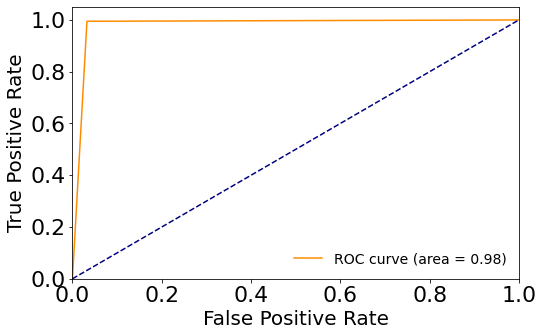

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

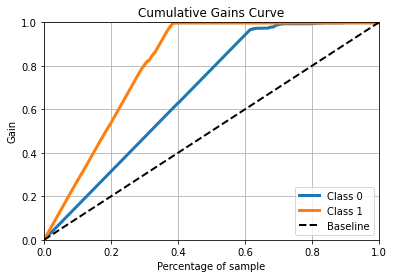

In [ ]:
import scikitplot as skplt

# Deriving Class probabilities
predicted_probabilities = nb_num.predict_proba(X_test_num)

# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

In [ ]:
y_pred_cat = nb_cat.predict(X_test_cat)

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_cat))
print('F1-score %s' % f1_score(y_test, y_pred_cat, average=None))
print(classification_report(y_test, y_pred_cat))

Accuracy 0.8919324577861163
F1-score [0.91569087 0.84952978]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1693
           1       0.86      0.84      0.85       972

    accuracy                           0.89      2665
   macro avg       0.89      0.88      0.88      2665
weighted avg       0.89      0.89      0.89      2665



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_cat)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8801118257458088


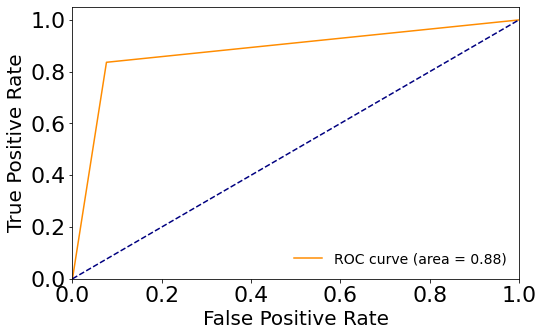

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

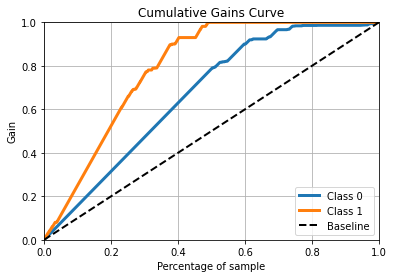

In [ ]:
import scikitplot as skplt

# Deriving Class probabilities
predicted_probabilities = nb_cat.predict_proba(X_test_cat)

# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

#### Logistic Regression

In [ ]:
y_pred = logistic.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8968105065666041
F1-score [0.92430498 0.83794932]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1693
           1       0.98      0.73      0.84       972

    accuracy                           0.90      2665
   macro avg       0.92      0.86      0.88      2665
weighted avg       0.91      0.90      0.89      2665



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8616060685611777


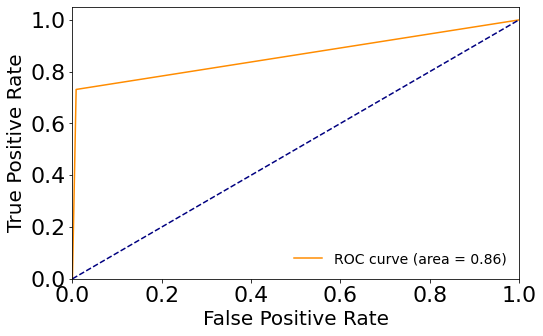

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

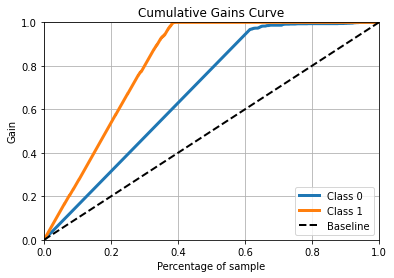

In [ ]:
import scikitplot as skplt
# Deriving Class probabilities
predicted_probabilities = logistic.predict_proba(X_test_log)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test,predicted_probabilities)

#### Decision Tree

In [ ]:
y_pred = dec_tree.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9328330206378986
F1-score [0.94840012 0.90381515]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1693
           1       0.95      0.87      0.90       972

    accuracy                           0.93      2665
   macro avg       0.94      0.92      0.93      2665
weighted avg       0.93      0.93      0.93      2665



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9184371498229212


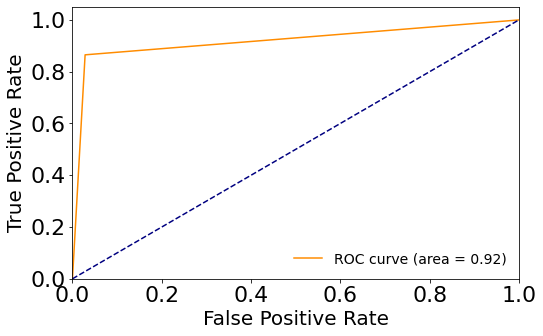

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), color='darkorange')
    
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

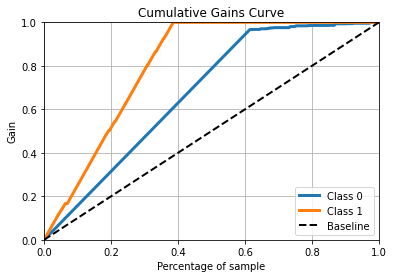

In [ ]:
import scikitplot as skplt
# Deriving Class probabilities
predicted_probabilities = dec_tree.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

# Dimensionality reduction

#### Variance threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

###### K-NN

In [ ]:
sel = VarianceThreshold(threshold = 0.2)
X_train_sel = sel.fit_transform(X_train)

X_train.shape, X_train_sel.shape

((8143, 9), (8143, 7))

In [ ]:
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



(2665, 7)

###### Naive Bayes

In [ ]:
sel = VarianceThreshold(threshold = 0.2)
X_train_sel = sel.fit_transform(X_train_num)

X_train_num.shape, X_train_sel.shape

((8143, 4), (8143, 4))

In [ ]:
X_test_sel = sel.transform(X_test_num)

clf = GaussianNB()
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



(2665, 4)

In [ ]:
sel = VarianceThreshold(threshold = 0.2)
X_train_sel = sel.fit_transform(X_train_cat)

X_train_cat.shape, X_train_sel.shape

((8143, 5), (8143, 3))

In [ ]:
X_test_sel = sel.transform(X_test_cat)

clf = CategoricalNB()
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      1693
           1       0.93      0.78      0.85       972

    accuracy                           0.90      2665
   macro avg       0.91      0.88      0.89      2665
weighted avg       0.90      0.90      0.90      2665



(2665, 3)

###### Logistic Regression

In [ ]:
sel = VarianceThreshold(threshold = 0.2)
X_train_sel = sel.fit_transform(X_train_log)

X_train_log.shape, X_train_sel.shape

((8143, 4), (8143, 4))

In [ ]:
X_test_sel = sel.transform(X_test_log)

clf = LogisticRegressionCV(cv=10, verbose = 0, scoring = 'accuracy')
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1693
           1       0.98      0.73      0.84       972

    accuracy                           0.90      2665
   macro avg       0.92      0.86      0.88      2665
weighted avg       0.91      0.90      0.89      2665



(2665, 4)

###### Decision Tree

In [ ]:
sel = VarianceThreshold(threshold = 0.2)
X_train_sel = sel.fit_transform(X_train)

X_train.shape, X_train_sel.shape

((8143, 9), (8143, 7))

In [ ]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(class_weight='balanced',
                       criterion='entropy', max_depth=4, min_samples_leaf=50)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

X_test_sel.shape

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1693
           1       0.95      0.87      0.90       972

    accuracy                           0.93      2665
   macro avg       0.94      0.92      0.93      2665
weighted avg       0.93      0.93      0.93      2665



(2665, 7)

#### Univariate Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest

###### K-NN

In [ ]:
k = [9,8,7,6,5,4,3,2,1]

In [ ]:
for x in k:
  sel = SelectKBest(k = x)
  X_train_sel = sel.fit_transform(X_train, y_train)
  X_test_sel = sel.transform(X_test)

  clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32)
  clf.fit(X_train_sel, y_train)

  y_pred = clf.predict(X_test_sel)
  print (X_train_sel.shape), print(sel.get_support(indices = True)), print(classification_report(y_test, y_pred))

(8143, 9)
[0 1 2 3 4 5 6 7 8]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

(8143, 8)
[0 1 2 3 4 6 7 8]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

(8143, 7)
[0 1 2 3 6 7 8]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98 

###### Naive Bayes

In [ ]:
k = [4,3,2,1]

In [ ]:
for x in k:
  sel = SelectKBest(k = x)
  X_train_sel = sel.fit_transform(X_train_num, y_train)
  X_test_sel = sel.transform(X_test_num)

  clf = GaussianNB()
  clf.fit(X_train_sel, y_train)

  y_pred = clf.predict(X_test_sel)
  print (X_train_sel.shape), print(sel.get_support(indices = True)), print(classification_report(y_test, y_pred))

(8143, 4)
[0 1 2 3]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

(8143, 3)
[0 2 3]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

(8143, 2)
[2 3]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0

In [ ]:
k = [5,4,3,2,1]

In [ ]:
for x in k:
  sel = SelectKBest(k = x)
  X_train_sel = sel.fit_transform(X_train_cat, y_train)
  X_test_sel = sel.transform(X_test_cat)

  clf = CategoricalNB()
  clf.fit(X_train_sel, y_train)

  y_pred = clf.predict(X_test_sel)
  print (X_train_sel.shape), print(sel.get_support(indices = True)), print(classification_report(y_test, y_pred))

(8143, 5)
[0 1 2 3 4]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1693
           1       0.86      0.84      0.85       972

    accuracy                           0.89      2665
   macro avg       0.89      0.88      0.88      2665
weighted avg       0.89      0.89      0.89      2665

(8143, 4)
[0 2 3 4]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1693
           1       0.75      0.71      0.73       972

    accuracy                           0.81      2665
   macro avg       0.80      0.79      0.79      2665
weighted avg       0.81      0.81      0.81      2665

(8143, 3)
[2 3 4]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1693
           1       0.77      0.80      0.79       972

    accuracy                           0.84      2665
   macro avg       0.83      0.83      0.83      2665
weighted avg  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Logistic Regression

In [ ]:
k = [4,3,2,1]

In [ ]:
for x in k:
  sel = SelectKBest(k = x)
  X_train_sel = sel.fit_transform(X_train_log, y_train)
  X_test_sel = sel.transform(X_test_log)

  clf = LogisticRegressionCV(cv=10, verbose = 0, scoring = 'accuracy')
  clf.fit(X_train_sel, y_train)

  y_pred = clf.predict(X_test_sel)
  print (X_train_sel.shape), print(sel.get_support(indices = True)), print(classification_report(y_test, y_pred))

(8143, 4)
[0 1 2 3]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1693
           1       0.98      0.73      0.84       972

    accuracy                           0.90      2665
   macro avg       0.92      0.86      0.88      2665
weighted avg       0.91      0.90      0.89      2665

(8143, 3)
[0 2 3]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1693
           1       0.97      0.72      0.83       972

    accuracy                           0.89      2665
   macro avg       0.92      0.86      0.87      2665
weighted avg       0.90      0.89      0.89      2665

(8143, 2)
[2 3]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1693
           1       0.98      0.74      0.84       972

    accuracy                           0.90      2665
   macro avg       0.93      0.87      0.88      2665
weighted avg       0

###### Decision Tree

In [ ]:
k = [9,8,7,6,5,4,3,2,1]

In [ ]:
for x in k:
  sel = SelectKBest(k = x)
  X_train_sel = sel.fit_transform(X_train, y_train)
  X_test_sel = sel.transform(X_test)

  clf = DecisionTreeClassifier(class_weight='balanced',
                       criterion='entropy', max_depth=4, min_samples_leaf=50)
  clf.fit(X_train_sel, y_train)

  y_pred = clf.predict(X_test_sel)
  print (X_train_sel.shape), print(sel.get_support(indices = True)), print(classification_report(y_test, y_pred))

(8143, 9)
[0 1 2 3 4 5 6 7 8]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1693
           1       0.95      0.87      0.90       972

    accuracy                           0.93      2665
   macro avg       0.94      0.92      0.93      2665
weighted avg       0.93      0.93      0.93      2665

(8143, 8)
[0 1 2 3 4 6 7 8]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

(8143, 7)
[0 1 2 3 6 7 8]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98 

#### ANOVA test

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
sel = SelectKBest(f_classif,k = 4)
X_train_sel = sel.fit_transform(X_train_num,y_train)

print(sel.scores_), print(sel.pvalues_)

[ 3320.03871395   146.5191078  37928.27417142  8381.53610493]
[0.00000000e+00 1.93480878e-33 0.00000000e+00 0.00000000e+00]


(None, None)

Text(0, 0.5, 'ANOVA Score')

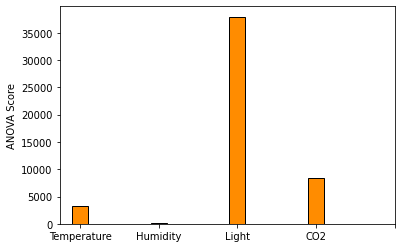

In [ ]:
sel = SelectKBest(f_classif,k = 4)
X_train_sel = sel.fit_transform(X_train_num,y_train)

scores = sel.scores_
plt.bar(sel.get_support(indices = True), scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')
plt.xticks(range(0,5),labels = ['Temperature','Humidity','Light', 'CO2'])
plt.ylabel('ANOVA Score')

#### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

###### K-NN

In [ ]:
k_range = list(range(1, int(math.sqrt(len(df)) + 1)))

param_grid = dict(n_neighbors=k_range, weights = ['distance','uniform'])

In [ ]:
unscaled_clf = make_pipeline(PCA(n_components=2), GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'accuracy'))
unscaled_clf.fit(X_train_num, y_train)
pred_test = unscaled_clf.predict(X_test_num)

In [ ]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'accuracy'))
std_clf.fit(X_train_num, y_train)
pred_test_std = std_clf.predict(X_test_num)

In [ ]:
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the normal test dataset with PCA
97.82%


Prediction accuracy for the standardized test dataset with PCA
89.61%



In [ ]:
unscaled_clf[1].best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

In [ ]:
std_clf[2].best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=83, p=2,
                     weights='uniform')

In [ ]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

In [ ]:
print('\nPC eigenvalues without scaling:\n', pca.explained_variance_ratio_)
print('\nPC eigenvalues with scaling:\n', pca_std.explained_variance_ratio_)


PC eigenvalues without scaling:
 [0.87122206 0.12861901]

PC eigenvalues with scaling:
 [0.57040612 0.29909627]


In [ ]:
X_train_transformed = pca.transform(X_train_num)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train_num))

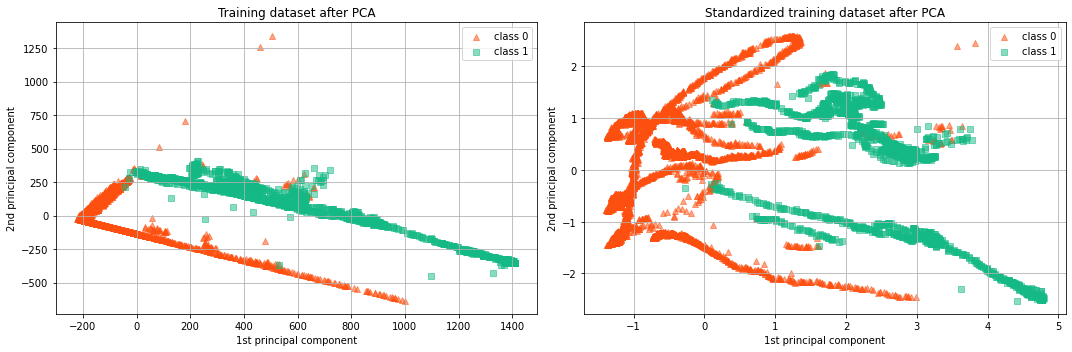

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize = (15,5))


for l, c, m in zip(range(0, 2), (color0,color1), ('^', 's')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 2), (color0,color1), ('^', 's')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

###### Naive Bayes

In [ ]:
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train_num, y_train)
pred_test = unscaled_clf.predict(X_test_num)

In [ ]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train_num, y_train)
pred_test_std = std_clf.predict(X_test_num)

In [67]:
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the normal test dataset with PCA
94.82%


Prediction accuracy for the standardized test dataset with PCA
93.06%



In [77]:
unscaled_clf[1].sigma_,unscaled_clf[1].theta_

(array([[ 21506.19292254,   9905.8214476 ],
        [113980.93673815,  30333.69277295]]),
 array([[-144.99627114,  -30.02559478],
        [ 537.88668772,  111.38471075]]))

In [ ]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

In [ ]:
print('\nPC eigenvalues without scaling:\n', pca.explained_variance_ratio_)
print('\nPC eigenvalues with scaling:\n', pca_std.explained_variance_ratio_)


PC eigenvalues without scaling:
 [0.87122206 0.12861901]

PC eigenvalues with scaling:
 [0.57040612 0.29909627]


In [ ]:
X_train_transformed = pca.transform(X_train_num)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train_num))

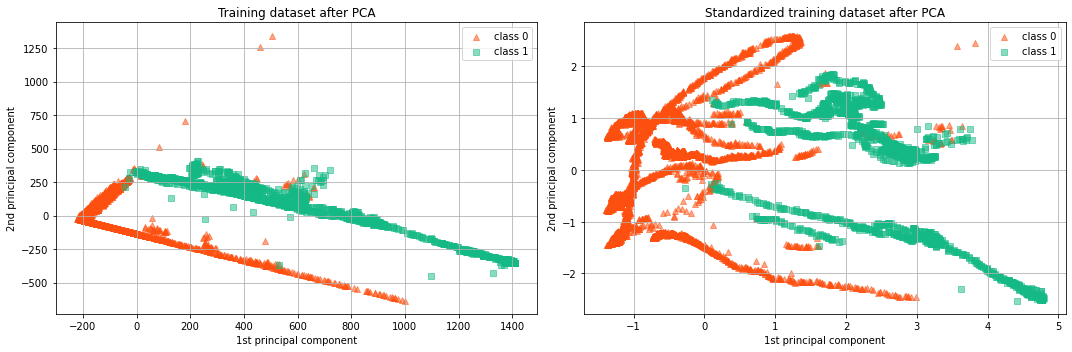

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize = (15,5))


for l, c, m in zip(range(0, 2), (color0,color1), ('^', 's')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 2), (color0,color1), ('^', 's')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

###### Logistic Regression

In [ ]:
std_clf = make_pipeline(PCA(n_components=2), LogisticRegressionCV(cv=10, verbose = 0, scoring = 'accuracy'))
std_clf.fit(X_train_log, y_train)
pred_test_std = std_clf.predict(X_test_log)

In [62]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
86.57%



In [64]:
std_clf[1].coef_, std_clf[1].intercept_

(array([[0.95521096, 0.08732659]]), array([-1.77309036]))

In [ ]:
pca_std = std_clf.named_steps['pca']

In [ ]:
print('\nPC eigenvalues with scaling:\n', pca_std.explained_variance_ratio_)


PC eigenvalues with scaling:
 [0.57040612 0.29909627]


In [ ]:
X_train_transformed = pca_std.transform(X_train_log)

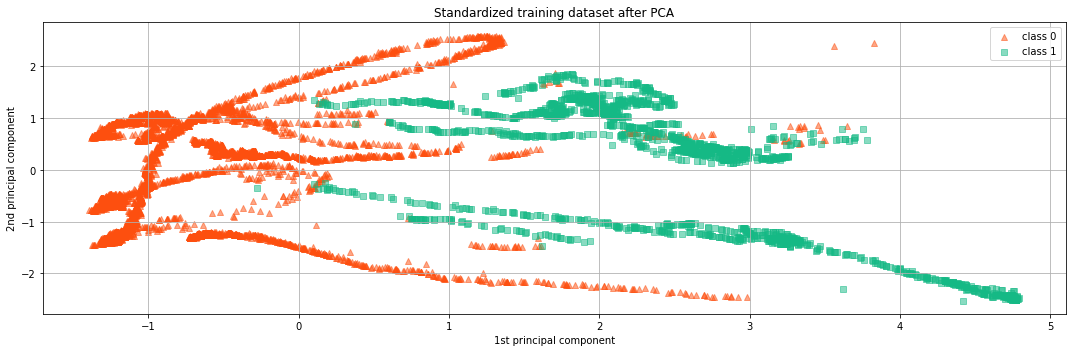

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))

for l, c, m in zip(range(0, 2), (color0,color1), ('^', 's')):
    ax.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')

ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()

###### Decision Tree

In [ ]:
param_list = {
    'max_depth': [1,2,3,4,5,6,7,8,9],
    'min_samples_split': [2,5,10,20,50,100,150,200],
    'min_samples_leaf': [10,50,100,150,200],
    'criterion': ['gini', 'entropy']
}

In [ ]:
unscaled_clf = make_pipeline(PCA(n_components=2), GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced'), param_list, cv = 10, scoring = 'accuracy'))
unscaled_clf.fit(X_train_num, y_train)
pred_test = unscaled_clf.predict(X_test_num)

In [ ]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced'), param_list, cv = 10, scoring = 'accuracy'))
std_clf.fit(X_train_num, y_train)
pred_test_std = std_clf.predict(X_test_num)

In [ ]:
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the normal test dataset with PCA
97.67%


Prediction accuracy for the standardized test dataset with PCA
92.46%



In [ ]:
unscaled_clf[1].best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
std_clf[2].best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

In [ ]:
print('\nPC eigenvalues without scaling:\n', pca.explained_variance_ratio_)
print('\nPC eigenvalues with scaling:\n', pca_std.explained_variance_ratio_)


PC eigenvalues without scaling:
 [0.87122206 0.12861901]

PC eigenvalues with scaling:
 [0.57040612 0.29909627]


In [ ]:
X_train_transformed = pca.transform(X_train_num)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train_num))

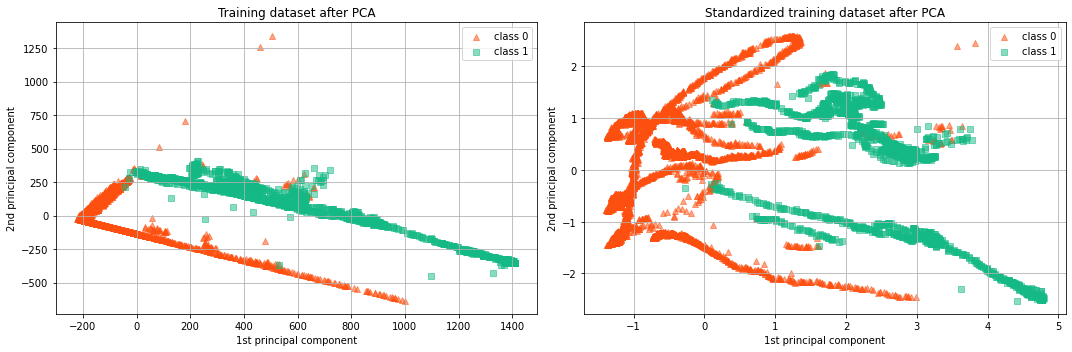

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize = (15,5))


for l, c, m in zip(range(0, 2), (color0,color1), ('^', 's')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 2), (color0,color1), ('^', 's')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

# Imbalanced data

In [ ]:
df['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

In [ ]:
df['Occupancy'].value_counts()/df['Occupancy'].count()

0    0.78767
1    0.21233
Name: Occupancy, dtype: float64

In [ ]:
size_class1 = df['Occupancy'][df['Occupancy']==1].count()
pct_class1 = df['Occupancy'][df['Occupancy']==1].count()/df['Occupancy'].count()
size_class1, pct_class1

(1729, 0.2123296082524868)

In [ ]:
new_size_class1 = int(size_class1 * 0.02 / pct_class1)
new_size_class1

162

In [ ]:
np.random.seed(18)
rows2remove = np.random.choice(df[df['Occupancy'] == 1].index, size_class1 - new_size_class1 , replace=False)
df_imb = df.drop(index=rows2remove, axis=0)

len(rows2remove), len(df_imb)

(1567, 6576)

In [ ]:
print('Dataset shape %s' % Counter(df_imb['Occupancy']))

Dataset shape Counter({0: 6414, 1: 162})


In [ ]:
df_imb['Occupancy'].value_counts()/df_imb['Occupancy'].count()

0    0.975365
1    0.024635
Name: Occupancy, dtype: float64

In [ ]:
### K-NN e Decision Tree
y_name = 'Occupancy'

attributes = [col for col in df.columns if col != y_name]
X_train = df_imb[attributes].values
y_train = df_imb[y_name]

In [ ]:
### Naive Bayes
num_attributes = [col for col in df.columns if col not in ['Occupancy','Disagio','Grande disagio','Pericolo', 'day', 'hour']]
cat_attributes = [col for col in df.columns if col in ['Disagio','Grande disagio','Pericolo', 'day', 'hour']]

X_train_num = df_imb[num_attributes].values
X_train_cat = df_imb[cat_attributes].values

num_attributes, cat_attributes

(['Temperature', 'Humidity', 'Light', 'CO2'],
 ['day', 'hour', 'Disagio', 'Grande disagio', 'Pericolo'])

In [ ]:
### Logistic Regression
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train_num)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

In [ ]:
!cat '/content/drive/My Drive/costcla-0.5/costcla/models/__init__.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/models/bagging.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/models/cost_ensemble.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/models/cost_tree.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/models/directcost.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/models/regression.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/metrics/__init__.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/metrics/costs.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/probcal/__init__.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/probcal/probcal.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/sampling/__init__.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/sampling/_smote.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/__init__.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/sampling/cost_sampling.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/sampling/sampling.py'
!cat '/content/drive/My Drive/costcla-0.5/costcla/utils/__init__.py
!cat '/content/drive/My Drive/costcla-0.5/costcla/utils/cross_validation.py'

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/costcla-0.5')

In [ ]:
pip install pyea

###### K-NN

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.8656660412757974
F1-score [0.90234588 0.78485577]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1693
           1       0.94      0.67      0.78       972

    accuracy                           0.87      2665
   macro avg       0.89      0.82      0.84      2665
weighted avg       0.88      0.87      0.86      2665



In [ ]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

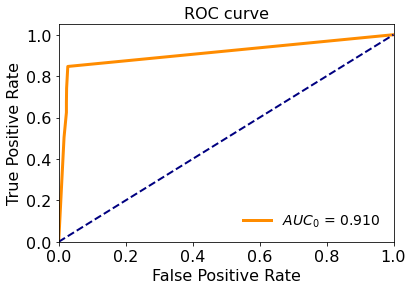

In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Methods for imbalanced data using K-NN

###### Adjust the decision threshold

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy 0.8090056285178236
F1-score [0.86748243 0.65815984]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1693
           1       0.95      0.50      0.66       972

    accuracy                           0.81      2665
   macro avg       0.86      0.74      0.76      2665
weighted avg       0.84      0.81      0.79      2665



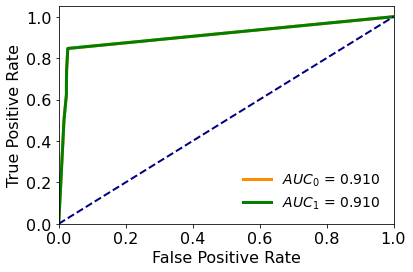

In [ ]:
def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Random undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 162, 1: 162})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9628517823639775
F1-score [0.96991796 0.95144679]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1693
           1       0.91      1.00      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.97      0.96      2665
weighted avg       0.97      0.96      0.96      2665



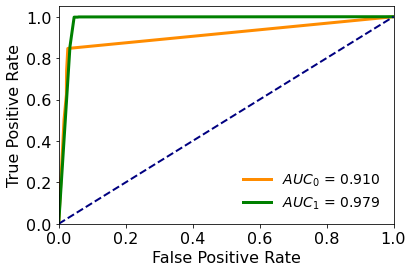

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Condensed nearest neighbor

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 162, 0: 42})


Accuracy 0.8446529080675422
F1-score [0.88034682 0.77860963]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1693
           1       0.81      0.75      0.78       972

    accuracy                           0.84      2665
   macro avg       0.84      0.82      0.83      2665
weighted avg       0.84      0.84      0.84      2665



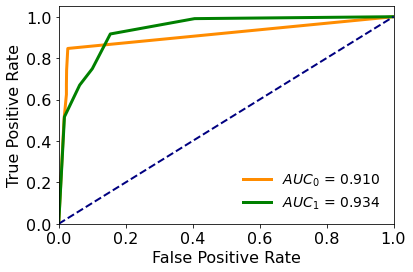

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Random oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 6414, 0: 6414})


Accuracy 0.899437148217636
F1-score [0.924972   0.84755404]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1693
           1       0.95      0.77      0.85       972

    accuracy                           0.90      2665
   macro avg       0.91      0.87      0.89      2665
weighted avg       0.90      0.90      0.90      2665



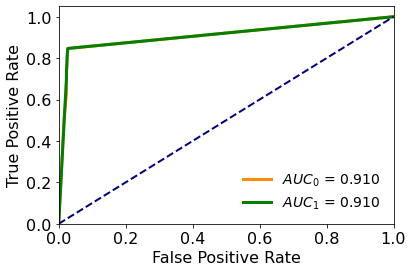

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 6414, 0: 6414})


Accuracy 0.9061913696060038
F1-score [0.92965672 0.85923423]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1693
           1       0.95      0.78      0.86       972

    accuracy                           0.91      2665
   macro avg       0.92      0.88      0.89      2665
weighted avg       0.91      0.91      0.90      2665



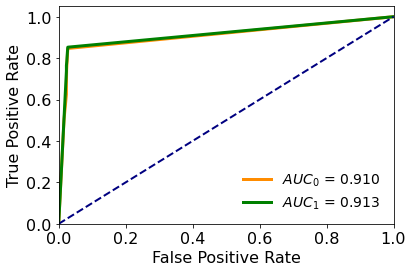

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### BayesMinimumRiskClassifier

In [ ]:
from costcla.models import BayesMinimumRiskClassifier
from costcla.metrics import savings_score

In [ ]:
y_test_knn = y_test.values
y_test_knn.shape

(2665,)

In [ ]:
cost = [1, 5, 0, 0]
cost_mat_test = np.array([cost] * len(X_test))
cost_mat_test.shape

(2665, 4)

In [ ]:
clf = KNeighborsClassifier().fit(X_train,y_train)
y_prob_test = clf.predict_proba(X_test)
y_pred_test_knn = clf.predict(X_test)
clf_bmr = BayesMinimumRiskClassifier()
clf_bmr.fit(y_test_knn, y_prob_test)
y_pred_test_bmr = clf_bmr.predict(y_prob_test, cost_mat_test)

print(savings_score(y_test_knn, y_pred_test_knn, cost_mat_test))
print(savings_score(y_test_knn, y_pred_test_bmr, cost_mat_test))

0.03484937979917302
0.5327820437093916


In [ ]:
print(accuracy_score(y_test_knn, y_pred_test_bmr))
print(accuracy_score(y_test_knn, y_pred_test_knn))

0.926829268292683
0.8656660412757974


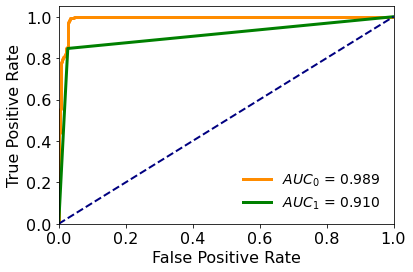

In [ ]:
fpr, tpr, _ = roc_curve(y_test_knn, y_prob_test[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train_num, y_train)

y_pred0 = clf.predict(X_test_num)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.9771106941838649
F1-score [0.98172011 0.96939288]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [ ]:
y_score = clf.predict_proba(X_test_num)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

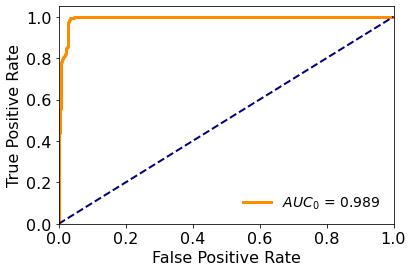

In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train)

y_pred0 = clf.predict(X_test_cat)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.8806754221388368
F1-score [0.90782609 0.83085106]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1693
           1       0.86      0.80      0.83       972

    accuracy                           0.88      2665
   macro avg       0.88      0.86      0.87      2665
weighted avg       0.88      0.88      0.88      2665



In [ ]:
y_score = clf.predict_proba(X_test_cat)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

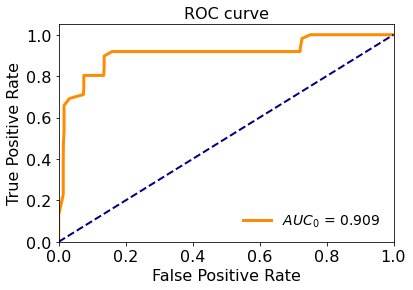

In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Methods for imbalanced data using GaussianNaiveBayes

###### Adjust the decision threshold

In [ ]:
clf = GaussianNB()
clf.fit(X_train_num, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy 0.974859287054409
F1-score [0.97995812 0.96628083]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.97      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.97      0.97      2665



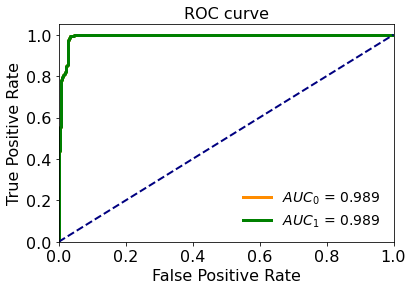

In [ ]:
def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test_num)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test_num, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_num)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Random undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train_num, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 162, 1: 162})


Accuracy 0.9636022514071294
F1-score [0.97059715 0.95224028]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1693
           1       0.91      0.99      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.97      0.96      2665
weighted avg       0.97      0.96      0.96      2665



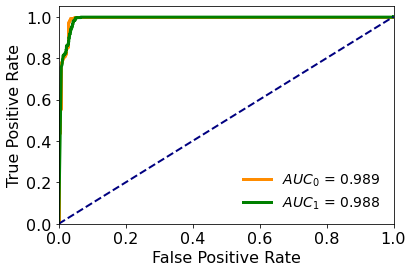

In [ ]:
clf = GaussianNB()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_num)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_num)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Condensed nearest neighbor

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train_num, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 162, 0: 43})


Accuracy 0.8859287054409005
F1-score [0.91560244 0.82407407]
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1693
           1       0.94      0.73      0.82       972

    accuracy                           0.89      2665
   macro avg       0.90      0.85      0.87      2665
weighted avg       0.89      0.89      0.88      2665



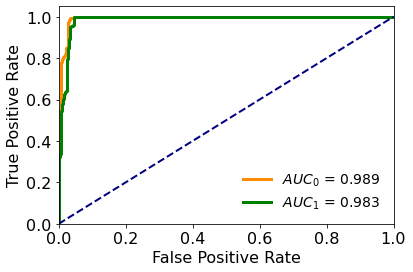

In [ ]:
clf = GaussianNB()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_num)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_num)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Random oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_num, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 6414, 0: 6414})


Accuracy 0.9774859287054409
F1-score [0.98201439 0.96990973]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



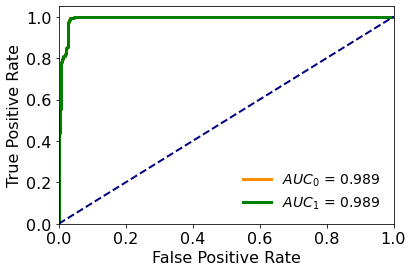

In [ ]:
clf = GaussianNB()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_num)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_num)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_num, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 6414, 0: 6414})


Accuracy 0.9711069418386492
F1-score [0.97703549 0.9610521 ]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.98      0.96       972

    accuracy                           0.97      2665
   macro avg       0.97      0.97      0.97      2665
weighted avg       0.97      0.97      0.97      2665



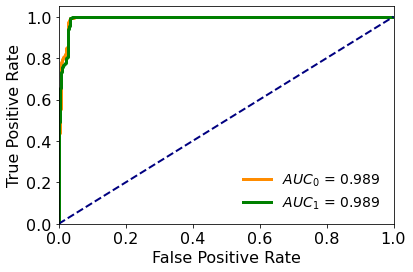

In [ ]:
clf = GaussianNB()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_num)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_num)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### BayesMinimumRiskClassifier

In [ ]:
from costcla.models import BayesMinimumRiskClassifier
from costcla.metrics import savings_score

In [ ]:
y_test_gnb = y_test.values
y_test_gnb.shape

(2665,)

In [ ]:
cost = [1, 5, 0, 0]
cost_mat_test = np.array([cost] * len(X_test))
cost_mat_test.shape

(2665, 4)

In [ ]:
clf = GaussianNB().fit(X_train_num,y_train)
y_prob_test = clf.predict_proba(X_test_num)
y_pred_test_gnb = clf.predict(X_test_num)
clf_bmr = BayesMinimumRiskClassifier()
clf_bmr.fit(y_test_gnb, y_prob_test)
y_pred_test_bmr = clf_bmr.predict(y_prob_test, cost_mat_test)

print(savings_score(y_test_gnb, y_pred_test_gnb, cost_mat_test))
print(savings_score(y_test_gnb, y_pred_test_bmr, cost_mat_test))

0.9497932663910219
0.9551092734790313


In [ ]:
print(accuracy_score(y_test_gnb, y_pred_test_bmr))
print(accuracy_score(y_test_gnb, y_pred_test_gnb))

0.9774859287054409
0.9771106941838649


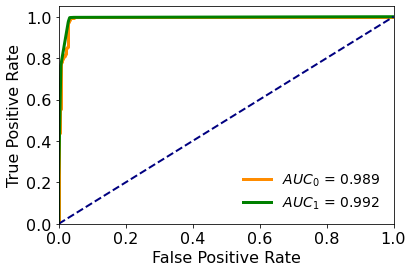

In [ ]:
fpr, tpr, _ = roc_curve(y_test_gnb, y_prob_test[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()
clf.fit(X_train_log, y_train)

y_pred0 = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.6360225140712945
F1-score [0.77731864 0.00410678]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1693
           1       1.00      0.00      0.00       972

    accuracy                           0.64      2665
   macro avg       0.82      0.50      0.39      2665
weighted avg       0.77      0.64      0.50      2665



In [ ]:
y_score = clf.predict_proba(X_test_log)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

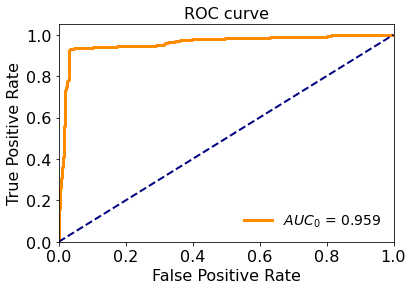

In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Methods for imbalanced data using LogisticRegression

###### Adjust the decision threshold

In [ ]:
clf = LogisticRegression()
clf.fit(X_train_log, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy 0.6356472795497186
F1-score [0.77714023 0.0020555 ]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1693
           1       1.00      0.00      0.00       972

    accuracy                           0.64      2665
   macro avg       0.82      0.50      0.39      2665
weighted avg       0.77      0.64      0.49      2665



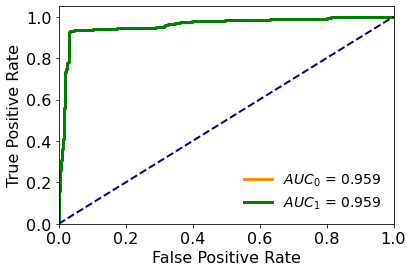

In [ ]:
def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test_log)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test_log, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Random undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train_log, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 162, 1: 162})


Accuracy 0.650281425891182
F1-score [0.78415933 0.07905138]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1693
           1       1.00      0.04      0.08       972

    accuracy                           0.65      2665
   macro avg       0.82      0.52      0.43      2665
weighted avg       0.77      0.65      0.53      2665



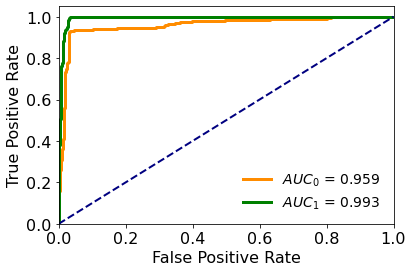

In [ ]:
clf = LogisticRegression()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Condensed nearest neighbor

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train_log, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 162, 0: 26})


Accuracy 0.9016885553470919
F1-score [0.91656051 0.8803653 ]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1693
           1       0.79      0.99      0.88       972

    accuracy                           0.90      2665
   macro avg       0.89      0.92      0.90      2665
weighted avg       0.92      0.90      0.90      2665



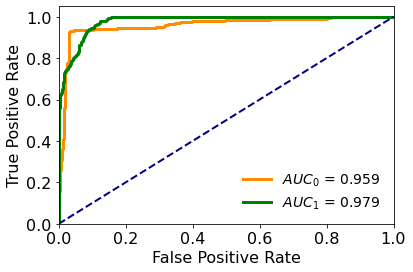

In [ ]:
clf = LogisticRegression()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Random oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_log, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 6414, 0: 6414})


Accuracy 0.6363977485928706
F1-score [0.77749713 0.00615385]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1693
           1       1.00      0.00      0.01       972

    accuracy                           0.64      2665
   macro avg       0.82      0.50      0.39      2665
weighted avg       0.77      0.64      0.50      2665



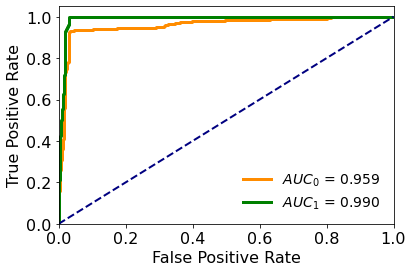

In [ ]:
clf = LogisticRegression()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_log, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 6414, 0: 6414})


Accuracy 0.6363977485928706
F1-score [0.77749713 0.00615385]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1693
           1       1.00      0.00      0.01       972

    accuracy                           0.64      2665
   macro avg       0.82      0.50      0.39      2665
weighted avg       0.77      0.64      0.50      2665



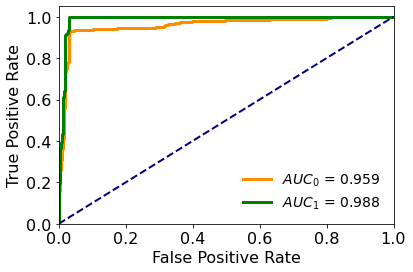

In [ ]:
clf = LogisticRegression()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Class weight

Accuracy 0.6363977485928706
F1-score [0.77749713 0.00615385]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1693
           1       1.00      0.00      0.01       972

    accuracy                           0.64      2665
   macro avg       0.82      0.50      0.39      2665
weighted avg       0.77      0.64      0.50      2665



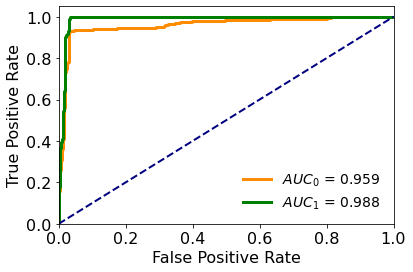

In [ ]:
clf = LogisticRegression(class_weight={0:1, 1: 10})
clf.fit(X_train_log, y_train)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Meta-cost Sentitive

In [ ]:
from costcla.models import CostSensitiveLogisticRegression
from costcla.metrics import savings_score

In [ ]:
cost = [8, 10, 0, 0]
cost_mat = np.array([cost] * len(X_train))
cost_mat.shape

(6576, 4)

Accuracy 0.6352720450281426
F1-score [0.77696191 0.        ]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1693
           1       0.00      0.00      0.00       972

    accuracy                           0.64      2665
   macro avg       0.32      0.50      0.39      2665
weighted avg       0.40      0.64      0.49      2665



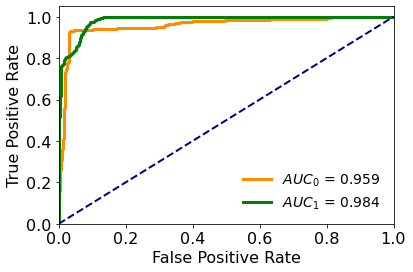

In [ ]:
clf = CostSensitiveLogisticRegression()
clf.fit(X_train_log, y_train, cost_mat)

y_pred = clf.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test_log)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.8874296435272045
F1-score [0.91671294 0.82638889]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1693
           1       0.94      0.73      0.83       972

    accuracy                           0.89      2665
   macro avg       0.90      0.85      0.87      2665
weighted avg       0.89      0.89      0.88      2665



In [ ]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

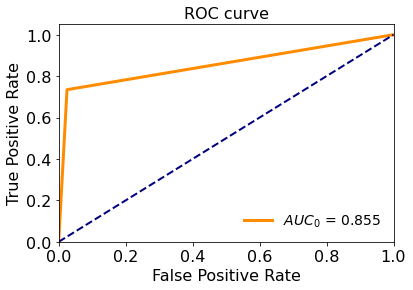

In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Methods for imbalanced data using DecisionTree

###### Adjust the decision threshold

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy 0.8949343339587242
F1-score [0.92183138 0.83981693]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1693
           1       0.95      0.76      0.84       972

    accuracy                           0.89      2665
   macro avg       0.91      0.87      0.88      2665
weighted avg       0.90      0.89      0.89      2665



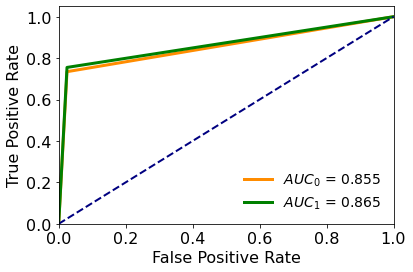

In [ ]:
def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Random undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 162, 1: 162})


Accuracy 0.9181988742964353
F1-score [0.93806818 0.87955801]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1693
           1       0.95      0.82      0.88       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.92      0.92      0.92      2665



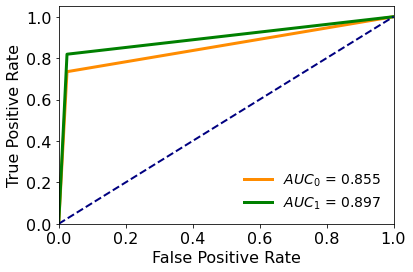

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Condensed nearest neighbor

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 162, 0: 42})


Accuracy 0.8649155722326454
F1-score [0.9006074  0.78922717]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1693
           1       0.92      0.69      0.79       972

    accuracy                           0.86      2665
   macro avg       0.88      0.83      0.84      2665
weighted avg       0.87      0.86      0.86      2665



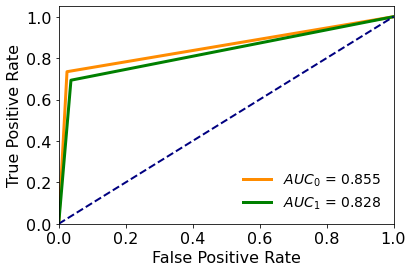

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Random oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 6414, 0: 6414})


Accuracy 0.8780487804878049
F1-score [0.91185245 0.80219111]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1693
           1       0.98      0.68      0.80       972

    accuracy                           0.88      2665
   macro avg       0.91      0.84      0.86      2665
weighted avg       0.89      0.88      0.87      2665



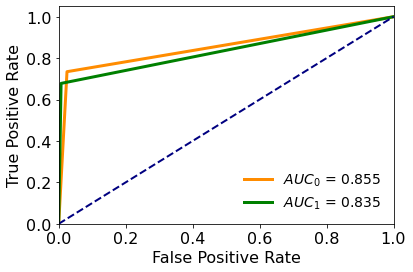

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 6414, 0: 6414})


Accuracy 0.8818011257035647
F1-score [0.91295938 0.81589714]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1693
           1       0.94      0.72      0.82       972

    accuracy                           0.88      2665
   macro avg       0.90      0.85      0.86      2665
weighted avg       0.89      0.88      0.88      2665



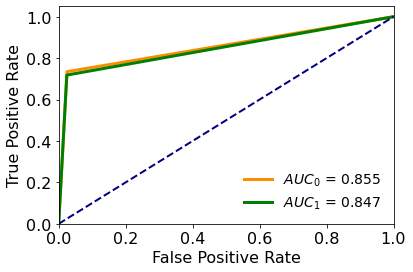

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Class weight

Accuracy 0.8979362101313321
F1-score [0.92397988 0.84474886]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1693
           1       0.95      0.76      0.84       972

    accuracy                           0.90      2665
   macro avg       0.91      0.87      0.88      2665
weighted avg       0.90      0.90      0.90      2665



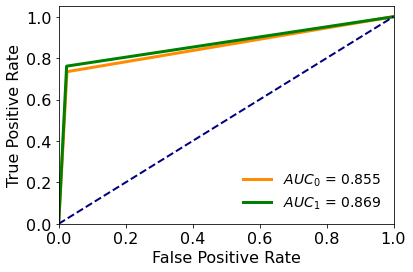

In [ ]:
clf = DecisionTreeClassifier(class_weight={0:1, 1: 10})
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

###### Meta-cost Sentitive

In [ ]:
from costcla.models import CostSensitiveDecisionTreeClassifier
from costcla.metrics import savings_score

In [ ]:
cost = [8, 10, 0, 0]
cost_mat = np.array([cost] * len(X_train))
cost_mat.shape

(6576, 4)

Accuracy 0.9140712945590994
F1-score [0.9350723  0.87298946]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1693
           1       0.95      0.81      0.87       972

    accuracy                           0.91      2665
   macro avg       0.92      0.89      0.90      2665
weighted avg       0.92      0.91      0.91      2665



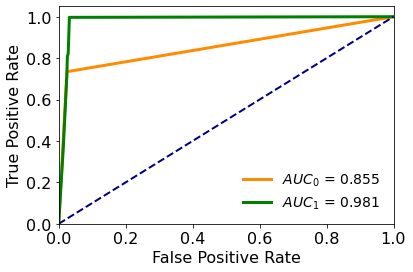

In [ ]:
clf = CostSensitiveDecisionTreeClassifier()
clf.fit(X_train, y_train, cost_mat)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [61]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Two-dimensional

In [62]:
df.corr()

,Temperature,Humidity,Light,CO2,Occupancy,day,hour,Disagio,Grande disagio,Pericolo
Temperature,1.000000,-0.141759,0.649942,0.559894,0.538220,-0.476898,0.260361,-0.225926,-0.241450,0.396210
Humidity,-0.141759,1.000000,0.037828,0.439023,0.132964,0.623248,0.017134,-0.350066,-0.407847,0.650133
Light,0.649942,0.037828,1.000000,0.664022,0.907352,-0.133959,0.084507,-0.175217,-0.210186,0.331903
CO2,0.559894,0.439023,0.664022,1.000000,0.712235,0.082218,0.209669,-0.152583,-0.473482,0.600914
Occupancy,0.538220,0.132964,0.907352,0.712235,1.000000,-0.109835,0.079630,-0.151380,-0.249621,0.359801
day,-0.476898,0.623248,-0.133959,0.082218,-0.109835,1.000000,-0.229633,-0.042618,-0.243277,0.287065
hour,0.260361,0.017134,0.084507,0.209669,0.079630,-0.229633,1.000000,-0.180384,0.012234,0.096197
Disagio,-0.225926,-0.350066,-0.175217,-0.152583,-0.151380,-0.042618,-0.180384,1.000000,-0.399820,-0.176788
Grande disagio,-0.241450,-0.407847,-0.210186,-0.473482,-0.249621,-0.243277,0.012234,-0.399820,1.000000,-0.831473
Pericolo,0.396210,0.650133,0.331903,0.600914,0.359801,0.287065,0.096197,-0.176788,-0.831473,1.000000


In [63]:
X_train_2 = df['Light'].values.reshape(-1,1)
y_train = df['CO2']

X_test_2 = df_test1['Light'].values.reshape(-1,1)
y_test = df_test1['CO2']

In [64]:
reg_2 = LinearRegression()
reg_2.fit(X_train_2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
print('Coefficients: \n', reg_2.coef_)
print('Intercept: \n', reg_2.intercept_)

Coefficients: 
 [1.07168048]
Intercept: 
 478.4596620707993


In [66]:
y_pred = reg_2.predict(X_test_2)

In [67]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.558
MSE: 37868.055
MAE: 133.646


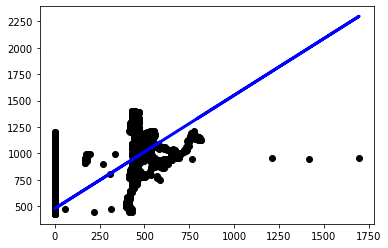

In [68]:
plt.scatter(X_test_2, y_test,  color='black')
plt.plot(X_test_2, y_pred, color='blue', linewidth=3)

### Lasso

In [69]:
reg_lasso = Lasso()
reg_lasso.fit(X_train_2, y_train)
print('Coefficients: \n', reg_lasso.coef_)
print('Intercept: \n', reg_lasso.intercept_)

Coefficients: 
 [1.07165412]
Intercept: 
 478.46281352374143


In [70]:
y_pred = reg_lasso.predict(X_test_2)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.558
MSE: 37867.614
MAE: 133.646


### Ridge

In [71]:
reg_ridge = Ridge()
reg_ridge.fit(X_train_2, y_train)
print('Coefficients: \n', reg_ridge.coef_)
print('Intercept: \n', reg_ridge.intercept_)

Coefficients: 
 [1.07168048]
Intercept: 
 478.4596624855536


In [72]:
y_pred = reg_ridge.predict(X_test_2)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.558
MSE: 37868.055
MAE: 133.646


### Multiple-dimension

In [73]:
attributes = [col for col in df.columns if col not in ['day', 'hour','CO2','Disagio','Grande disagio','Pericolo']]

X_train_mul = df[attributes].values
y_train = df['CO2']

X_test_mul = df_test1[attributes].values
y_test = df_test1['CO2']

attributes

['Temperature', 'Humidity', 'Light', 'Occupancy']

In [74]:
reg = LinearRegression()
reg.fit(X_train_mul, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 1.20634963e+02  2.44743004e+01 -8.78925700e-02  3.79908918e+02]
Intercept: 
 -2580.7578275019355


In [75]:
y_pred = reg.predict(X_test_mul)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.826
MSE: 14871.703
MAE: 78.730
